In [1]:
# -*- coding: utf-8 -*-

#In this script we use a simple classifer called naive bayes and try to predict the violations. 

# 9 Feb 2016
# @author: reyhane_askari
# Universite de Montreal, DIRO

import csv
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
from os import chdir, listdir
from pandas import read_csv
from os import path
from random import randint, sample, seed
from collections import OrderedDict
from pandas import DataFrame, Series
import numpy as np 
import csv
import codecs

%matplotlib inline

colnames = ['old_index','job_id', 'task_idx','sched_cls', 'priority', 'cpu_requested',
            'mem_requested', 'disk', 'violation'] 

tain_path = r'/home/askrey/Dropbox/Project_step_by_step/3_create_database/csvs/frull_db_2.csv'

X = pd.read_csv(tain_path, header = None, index_col = False ,names = colnames, skiprows = [0],  usecols = [3,4,5,6,7])
y = pd.read_csv(tain_path, header = None, index_col = False ,names = colnames, skiprows = [0],  usecols = [8])
y = y['violation'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.333, random_state=0)


/Users/reyhane.askari/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


IOError: File /home/askrey/Dropbox/Project_step_by_step/3_create_database/csvs/frull_db_2.csv does not exist

0.919970149254


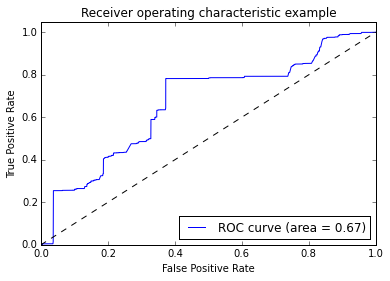

Number of mislabeled points out of a total 67000 points : 5362


In [2]:

from sklearn.naive_bayes import GaussianNB, BernoulliNB
gnb = GaussianNB() #Guassian Naive Bayes
# gnb = BernoulliNB() #Bernoulli Naive Bayes
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_score = gnb.fit(X_train, y_train).predict_proba(X_test)[:,1]
mean_accuracy = gnb.fit(X_train, y_train).score(X_test,y_test,sample_weight=None)
# print(y_score)
print(mean_accuracy)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

plt.legend(loc="lower right")

plt.savefig('/home//askrey/Dropbox/Project_step_by_step/3_create_database/naive_bays_guassian.png')

plt.show()


print("Number of mislabeled points out of a total %d points : %d"
    % (X_test.shape[0],(y_test != y_pred).sum()))


In [ ]:
gnb = BernoulliNB() #Bernoulli Naive Bayes
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_score = gnb.fit(X_train, y_train).predict_proba(X_test)[:,1]
mean_accuracy = gnb.fit(X_train, y_train).score(X_test,y_test,sample_weight=None)
# print(y_score)
print(mean_accuracy)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.savefig('/home//askrey/Dropbox/Project_step_by_step/3_create_database/naive_bayes_bernoulli.png')
plt.show()
print("Number of mislabeled points out of a total %d points : %d"
    % (X_test.shape[0],(y_test != y_pred).sum()))


The scores.mean is : 0.970881


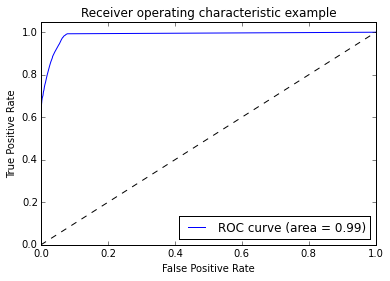

Number of mislabeled points out of a total 67000 points : 1919
The mean accuracy is : 0.971478


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, X_test, y_test)
print("The scores.mean is : %f" %scores.mean())

y_pred = clf.fit(X_train, y_train).predict(X_test)
y_score = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]


mean_accuracy = clf.fit(X_train, y_train).score(X_test,y_test,sample_weight=None)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.savefig('/home//askrey/Dropbox/Project_step_by_step/3_create_database/random_forest.png')
plt.show()
print("Number of mislabeled points out of a total %d points : %d"
    % (X_test.shape[0],(y_test != y_pred).sum()))
print("The mean accuracy is : %f" %mean_accuracy)